In this project, I will be scraping the wikipedia page of "Largest Technology Companies by Revenue", collecting data on the biggest technology companies in 2023 and their corresponding revenues. I will be using the library "Beautiful Soup" to extract and scrape data from the wiki page.

The first step in extraction is confirming that all necessary libraries are installed properly. In order to do this I executed a `try` and `except` that downloads the programs in the case of an error.

In [27]:
# Making sure all necessary libraries are installed for scraping

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported.")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported.")

import requests

BeautifulSoup and Pandas are already installed and imported.


Next, I am going to load the wikipedia page, creating an `html` parser to parse through the source code of the page.

In [28]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_largest_technology_companies_by_revenue")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

wikipedia_text = opened_webpage.text

Webpage opened successfully...
Webpage loaded and parsed successfully...


Next, I will extract the raw data into a list for easy parsing and manipulation. In order to do this, I will first initialize an empty list titled `raw_data`, and create a for loop that iterates through each row in the text, adding it to `raw_data` after every iteration. I am using the BeautifulSoup library to ensure that only the tables in the wiki page are extracted. I will emphasize keeping the raw data separate from the final data that will be processed and cleaned.

In [29]:
raw_data = [] # Empty list where the data will be kept

table = bs.find_all("table")[1] # Finding the 2023 list table that is in the [1] position on the wiki page

for row in table:
    line = row.text
    raw_data.append(line)

print(raw_data) # The raw data is now in the list raw_data


['\n', '\nRank\n\nCompany\n\nRevenue ($B) USD[2]\n\nEmployees[2]\n\nRevenue per Employees ($K USD)[2]\n\nHeadquarters\n\n\n1\n\nApple\n$383.93\n147,000\n1867.44897\nCupertino, California, US\n\n\n2\n\nSamsung Electronics\n$200.734\n267,937\n749.18357\nSuwon, South Korea\n\n\n3\n\nAlphabet\n$182.527\n135,301\n1349.04398\nMountain View, California, US\n\n\n4\n\nFoxconn\n$181.945\n878,429\n207.12544\n\nNew Taipei City, Taiwan\n\n\n5\n\nMicrosoft\n$143.015\n163,000\n877.39263\nRedmond, Washington, US\n\n\n6\n\nHuawei\n$129.184\n197,000\n655.75634\nShenzhen, China\n\n\n7\n\nDell Technologies\n$92.224\n158,000\n583.6962\nRound Rock, Texas, US\n\n\n8\n\nMeta\n$85.965\n58,604\n1466.87939\nMenlo Park, California, US\n\n\n9\n\nSony\n$84.893\n109,700\n773.86508\nTokyo, Japan\n\n\n10\n\nHitachi\n$82.345\n350,864\n234.69207\nTokyo, Japan\n\n\n11\n\nIntel\n$77.867\n110,600\n704.04159\nSanta Clara, California, US\n\n\n12\n\nIBM\n$73.620\n364,800\n201.80921\nArmonk, New York, US\n\n\n13\n\nTencent\n$6

Now, I will transform the data by going through the raw data row by row and extracting key-value pairs from my targeted table. After transforming the data and putting it into the list `final_data`, I will convert the data into a dataframe using the pandas library.

In [129]:
final_data = [] # Initialize a list to hold cleaned data from raw data

# Create for loop that iterates through the rows and data in selected table in raw data (2023 list)
for row in table.find_all('tr'):
    columns = row.find_all('td')
    column3_data = ''
    column4_data = ''
    if len(columns) >= 4:  # Added if statement that checks if there are at least 3 columns to avoid index error
       column3_data = columns[2].text.strip() # Getting the data from the selected columns and removing the whitespaces with .strip
       column4_data = columns[3].text.strip()

    final_data.append([column3_data, column4_data])

print(final_data)

[['', ''], ['Apple', '$383.93'], ['Samsung Electronics', '$200.734'], ['Alphabet', '$182.527'], ['Foxconn', '$181.945'], ['Microsoft', '$143.015'], ['Huawei', '$129.184'], ['Dell Technologies', '$92.224'], ['Meta', '$85.965'], ['Sony', '$84.893'], ['Hitachi', '$82.345'], ['Intel', '$77.867'], ['IBM', '$73.620'], ['Tencent', '$69.864'], ['Panasonic', '$63.191'], ['Lenovo', '$60.742'], ['HP Inc.', '$56.639'], ['LG Electronics', '$53.625']]


In [130]:
final_data = pandas.DataFrame(final_data) # Converting final_data into a dataframe using pandas

final_data

,0,1
0,,
1,Apple,$383.93
2,Samsung Electronics,$200.734
3,Alphabet,$182.527
4,Foxconn,$181.945
5,Microsoft,$143.015
6,Huawei,$129.184
7,Dell Technologies,$92.224
8,Meta,$85.965
9,Sony,$84.893


No charts were generated by quickchart


Now that I have transformed my data to make it more workable, I will do further cleaning, such as deleting duplicate rows.  

In [131]:
# Discovering how many duplicate values exist
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Deleting duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

final_data

 Number of duplicates before : 0
 Number of duplicates after removing : 0


,0,1
0,,
1,Apple,$383.93
2,Samsung Electronics,$200.734
3,Alphabet,$182.527
4,Foxconn,$181.945
5,Microsoft,$143.015
6,Huawei,$129.184
7,Dell Technologies,$92.224
8,Meta,$85.965
9,Sony,$84.893


After extracting and transforming the data from the wikipedia page, I will store and load the dataframe into a .csv file titled "Largest_Tech_Companies.csv".

In [132]:
# Loading cleaned data into a .csv file
final_data.to_csv("Largest_Tech_Companies.csv")

Next, I will use the .describe method to gather the descriptive statistics of the final data.

In [133]:
final_data.describe()

,0,1
count,18,18
unique,18,18
top,,
freq,1,1


In [134]:
largest_tech_companies_df = pandas.read_csv("Largest_Tech_Companies.csv")

In order to create visualizations for the data, I will import the necessary libraries, such as numpy and matplotlib.

In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Since I have the categorical variable of "companies" and the numerical variable of "revenue" I will be plotting the data on a bar graph using the pyplot feature of the matplotlib library that was previously installed, customizing my labels and plotted companies. It is also important to note that the revenue is amounted in Billions, as specified in the axis label.

Text(0.5, 1.0, 'Tech Companies by Revenue')

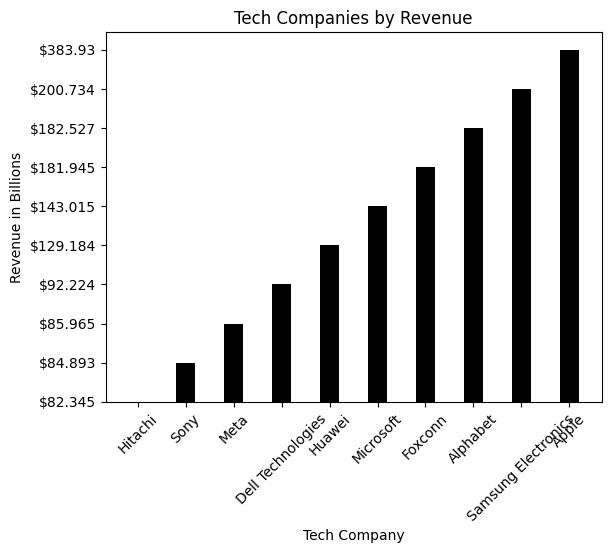

In [136]:
plotted_companies = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

company_column = largest_tech_companies_df["0"]
revenue_column = largest_tech_companies_df["1"]

selected_dates = []
selected_temps = []

for company_id in plotted_companies:
    selected_dates.append(company_column[company_id])
    selected_temps.append(revenue_column[company_id])

plt.bar(selected_dates, selected_temps, color ='black', width = 0.4)

plt.xticks(rotation=45) # Changing the rotation of the company names to avoid overlap

plt.xlabel("Tech Company")
plt.ylabel("Revenue in Billions")
plt.title("Tech Companies by Revenue")